In [1]:
from matplotlib import animation, rc, cm, pyplot as plt
from celluloid import Camera
from IPython.display import HTML
import numpy as np
from scipy.sparse import csr_matrix
from tqdm import tqdm
from IPython.display import clear_output
from time import sleep
from matplotlib.pyplot import figure
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.interpolate import griddata

In [2]:
from scipy import sparse
from scipy.sparse.linalg import spsolve

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from FiniteElements.MeshUtils import Mesh

In [19]:
fun = lambda x,y: (x-3/4)-(y-np.sqrt(3)/4)

In [7]:
def f(x,y):
    if np.sqrt((x-3/4)**2 + (y-np.sqrt(3)/4)**2) < 0.001:
        return 1
    else:
        return 0
    

In [12]:
N=1500
mesh = Mesh(N)

In [13]:
# solution=mesh.solve(lambda x,y: (x-3/4)-(y-np.sqrt(3)/4))
solution=mesh.solve(f)

In [14]:
np.max(solution)

2.8752455113753186e-06

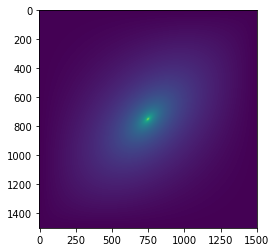

In [15]:
plt.imshow(solution.reshape(N + 1, N + 1))

In [16]:
def surface_plot(viewing_angle):
    X = mesh._vertices - np.array([3/4, np.sqrt(3)/4]).reshape(1, -1)
    _x = X[:,0]
    _y = X[:,1]

    L=1000
    x=np.linspace(-1, 1, L)
    y=np.linspace(-1, 1, L)
    xv, yv = np.meshgrid(x, y)
    z = griddata((_x, _y) ,solution, (xv, yv), method='linear')
    z[np.isnan(z)] = 0.0

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(xv, yv, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)

    
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    ax.view_init(elev=None, azim=viewing_angle)
    plt.show()

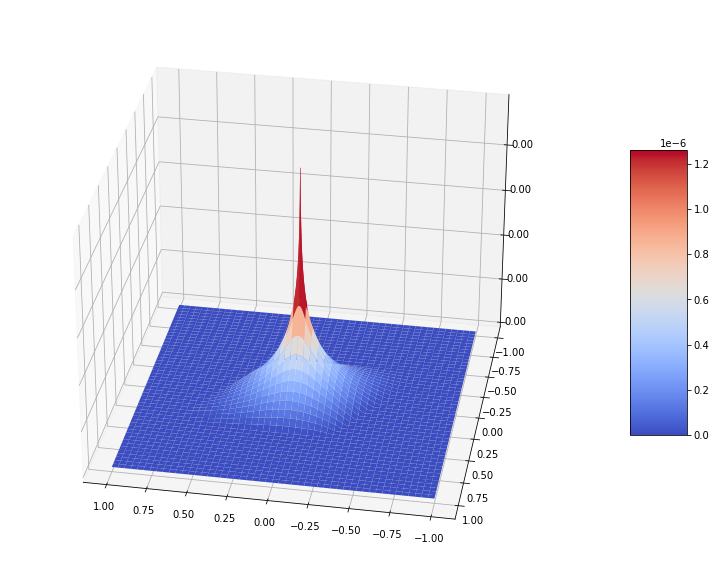

In [18]:
surface_plot(viewing_angle=100)